In [59]:
import numpy as np
import pandas
from astropy import units as u
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
'''

Comparing which items in the Urquhart catalog (RMS_LarsonStats.txt) are the same as those in the RAMPS catalog (RAMPS_clump_catalog_diss_data.txt) by location

'''

RAMPS_data = pandas.read_csv('RAMPS_cleaned.csv', sep = ',')
RMS_data = pandas.read_csv('RMS_cleaned.csv', sep=',')
# RAMPS_data['l']
# Urquhart_data.head()

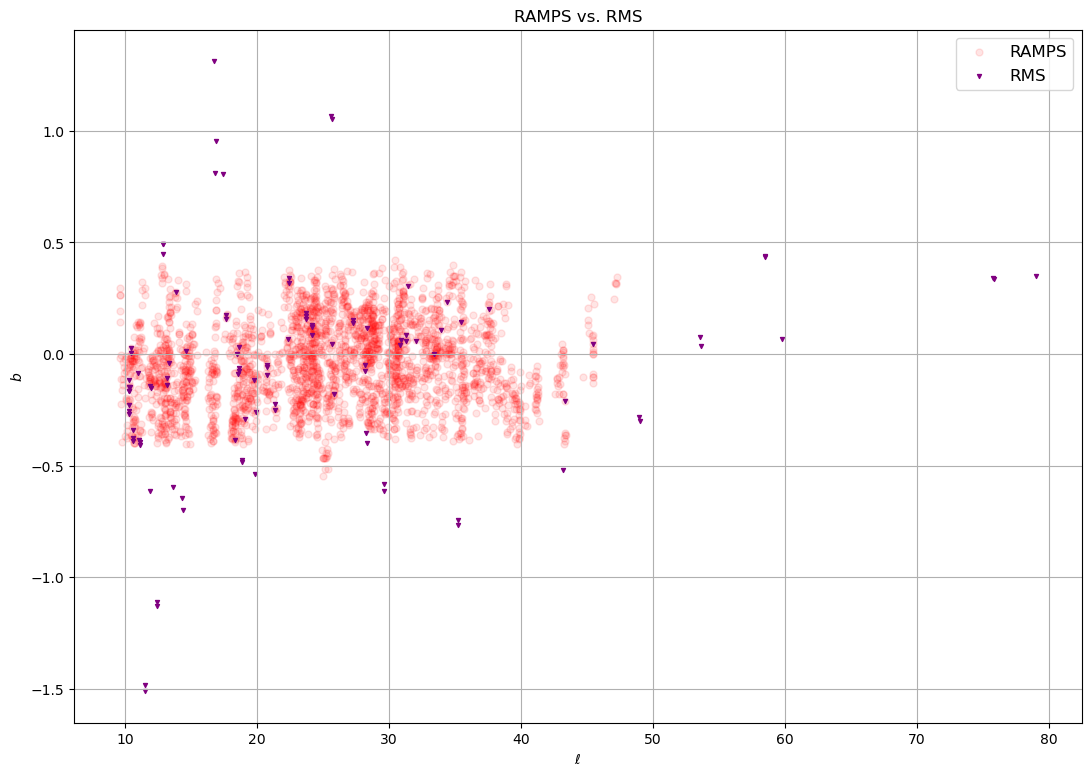

In [5]:
plt.figure(figsize=(13, 9))
plt.scatter(RAMPS_data['l'], RAMPS_data['b'], marker = 'o', s = 25, label='RAMPS', color = 'red', alpha = 0.1)
plt.scatter(RMS_data['l'], RMS_data['b'], marker = 'v', s=8, label = 'RMS', color = 'purple')
plt.legend(fontsize = 'large')
plt.title('RAMPS vs. RMS')
plt.xlabel('$\ell$')
plt.ylabel('$b$')
plt.grid()
plt.savefig('/users/hfwest/GBO-REU/plots/RAMPS_vs_RMS.png')

In [ ]:
max_b = max(RAMPS_data['b'])
min_b = min(RAMPS_data['b'])
print('Max b:', max_b)
print('Min b:', min_b)


Max b: 0.42
Min b: -0.546
Matching indices: [4.6936e-322 1.3196e-320]


In [34]:
threshold = 30/3600 # beamsize in degrees
masked_RMS_l = RMS_data['l'][(RMS_data['b'] < max_b) & (RMS_data['b'] > min_b)]
masked_RMS_b = RMS_data['b'][(RMS_data['b'] < max_b) & (RMS_data['b'] > min_b)]
masked_RMS_dispersion = RMS_data['sigma (km/s)'][(RMS_data['b'] < max_b) & (RMS_data['b'] > min_b)]
masked_RMS_size = RMS_data['Linear Size (pc)'][(RMS_data['b'] < max_b) & (RMS_data['b'] > min_b)]

matching_info = np.array([]).reshape(0, 9)

for i in masked_RMS_b.index: # must iterate through index instead of range of length because it is still using original unmasked indices
    c1 = SkyCoord(masked_RMS_l[i]*u.degree, masked_RMS_b[i]*u.degree, frame='galactic')
    for j in RAMPS_data.index:
        c2 = SkyCoord(RAMPS_data['l'][j]*u.degree, RAMPS_data['b'][j]*u.degree, frame='galactic')
        sep = c1.separation(c2).deg
        if sep < threshold:
            matching_info = np.append(matching_info, np.array([RAMPS_data['l'][j], RAMPS_data['b'][j], 
                                                      masked_RMS_l[i], masked_RMS_b[i], sep, 
                                                      masked_RMS_dispersion[i], masked_RMS_size[i],
                                                      RAMPS_data['sigma (km/s)'][j], RAMPS_data['Linear Size (pc)'][j]]).reshape(1, 9), axis = 0)


In [ ]:
matching_DF = pandas.DataFrame(matching_info, columns=['RAMPS l', 'RAMPS b', 'RMS l', 'RMS b', 'Separation (deg)',
                                                      'RMS Dispersion (km/s)', 'RMS Size (pc)',
                                                      'RAMPS Dispersion (km/s)', 'RAMPS Size (pc)'])
matching_DF
# matching_DF.to_csv('RMS-RAMPS-Match.csv', header = ['RAMPS l', 'RAMPS b', 'RMS l', 'RMS b', 'Separation (deg)',
#                                                       'RMS Dispersion (km/s)', 'RMS Size (pc)',
#                                                       'RAMPS Dispersion (km/s)', 'RAMPS Size (pc)'], index = False)

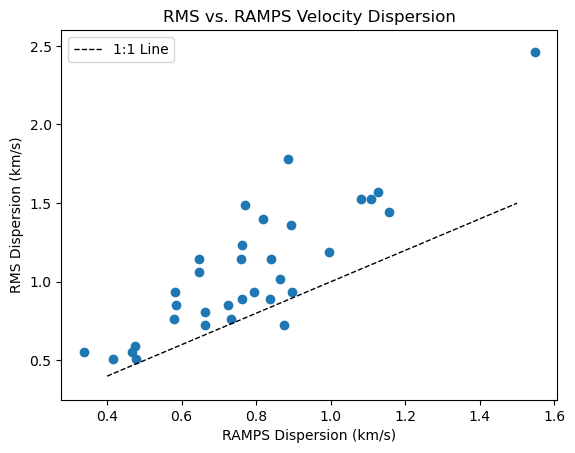

In [55]:
plt.scatter(matching_DF['RAMPS Dispersion (km/s)'], matching_DF['RMS Dispersion (km/s)'])
plt.title('RMS vs. RAMPS Velocity Dispersion')
plt.xlabel('RAMPS Dispersion (km/s)')
plt.ylabel('RMS Dispersion (km/s)')
plt.plot([.4, 1.5], [.4, 1.5], color='black', linestyle='--', linewidth=1, label='1:1 Line')
plt.ylim(.25, 2.6)
plt.legend()
plt.show()

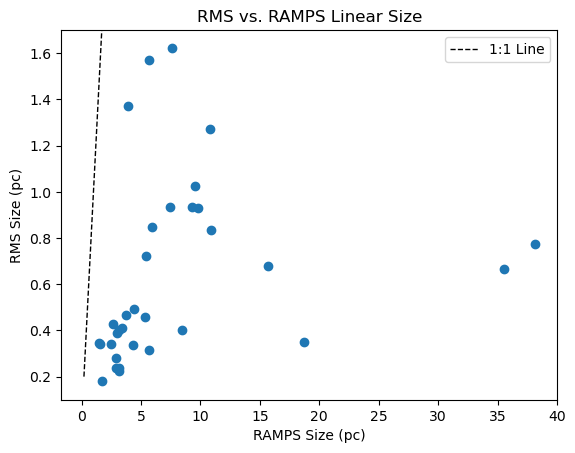

In [54]:
plt.scatter(matching_DF['RAMPS Size (pc)'], matching_DF['RMS Size (pc)'])
plt.title('RMS vs. RAMPS Linear Size')
plt.xlabel('RAMPS Size (pc)')
plt.ylabel('RMS Size (pc)')
plt.plot([.2, 35], [.2, 35], color='black', linestyle='--', linewidth=1, label='1:1 Line')
plt.legend()
plt.ylim(0.1, 1.7)
plt.show()

In [56]:
threshold = 60/3600 # Increased threshold to 60 arcseconds to find more matches
masked_RMS_l = RMS_data['l'][(RMS_data['b'] < max_b) & (RMS_data['b'] > min_b)]
masked_RMS_b = RMS_data['b'][(RMS_data['b'] < max_b) & (RMS_data['b'] > min_b)]
masked_RMS_dispersion = RMS_data['sigma (km/s)'][(RMS_data['b'] < max_b) & (RMS_data['b'] > min_b)]
masked_RMS_size = RMS_data['Linear Size (pc)'][(RMS_data['b'] < max_b) & (RMS_data['b'] > min_b)]

matching_info_broad = np.array([]).reshape(0, 9)
matched_Js = []

for i in masked_RMS_b.index: # must iterate through index instead of range of length because it is still using original unmasked indices
    c1 = SkyCoord(masked_RMS_l[i]*u.degree, masked_RMS_b[i]*u.degree, frame='galactic')
    best_match = None
    for j in RAMPS_data.index:
        c2 = SkyCoord(RAMPS_data['l'][j]*u.degree, RAMPS_data['b'][j]*u.degree, frame='galactic')
        sep = c1.separation(c2).deg
        if sep < threshold and (best_match == None or sep < best_match):
            best_match = j
    if best_match is not None and best_match not in matched_Js:
        matched_Js = np.append(matched_Js, best_match)
        matching_info_broad = np.append(matching_info_broad, np.array([RAMPS_data['l'][best_match], RAMPS_data['b'][best_match], 
                                                      masked_RMS_l[i], masked_RMS_b[i], sep, 
                                                      masked_RMS_dispersion[i], masked_RMS_size[i],
                                                      RAMPS_data['sigma (km/s)'][best_match], RAMPS_data['Linear Size (pc)'][best_match]]).reshape(1, 9), axis = 0)

matching_DF_broad = pandas.DataFrame(matching_info_broad, columns=['RAMPS l', 'RAMPS b', 'RMS l', 'RMS b', 'Separation (deg)',
                                                      'RMS Dispersion (km/s)', 'RMS Size (pc)',
                                                      'RAMPS Dispersion (km/s)', 'RAMPS Size (pc)'])
matching_DF_broad.to_csv('RMS-RAMPS-Match-Broad.csv', header = ['RAMPS l', 'RAMPS b', 'RMS l', 'RMS b', 'Separation (deg)',
                                                      'RMS Dispersion (km/s)', 'RMS Size (pc)',
                                                      'RAMPS Dispersion (km/s)', 'RAMPS Size (pc)'], index = False)


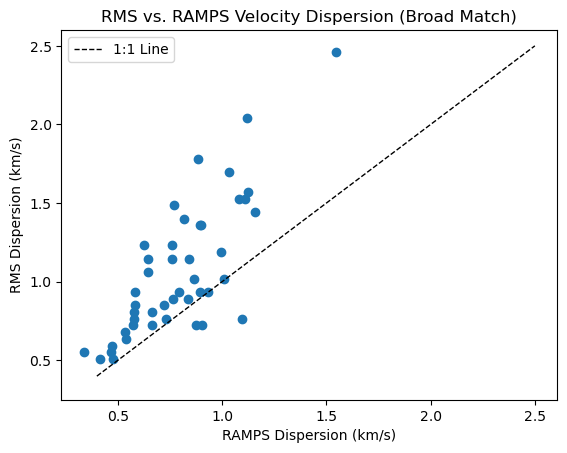

In [57]:
plt.scatter(matching_DF_broad['RAMPS Dispersion (km/s)'], matching_DF_broad['RMS Dispersion (km/s)'])
plt.title('RMS vs. RAMPS Velocity Dispersion (Broad Match)')
plt.xlabel('RAMPS Dispersion (km/s)')
plt.ylabel('RMS Dispersion (km/s)')
plt.plot([.4, 2.5], [.4, 2.5], color='black', linestyle='--', linewidth=1, label='1:1 Line')
plt.legend()
plt.ylim(.25, 2.6)
plt.show()

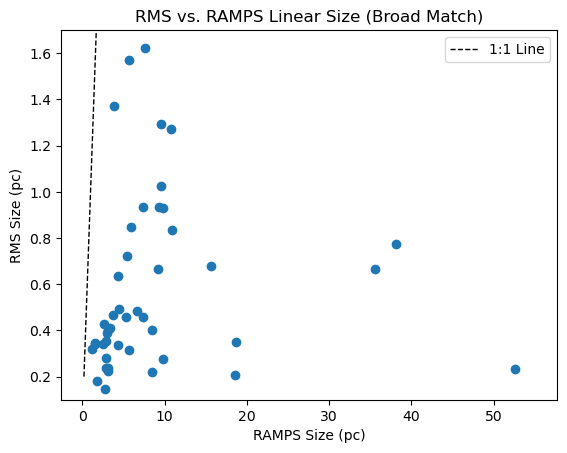

In [58]:
plt.scatter(matching_DF_broad['RAMPS Size (pc)'], matching_DF_broad['RMS Size (pc)'])
plt.title('RMS vs. RAMPS Linear Size (Broad Match)')
plt.xlabel('RAMPS Size (pc)')
plt.ylabel('RMS Size (pc)')
plt.plot([.2, 55], [.2, 55], color='black', linestyle='--', linewidth=1, label='1:1 Line')
plt.legend()
plt.ylim(0.1, 1.7)
plt.show()

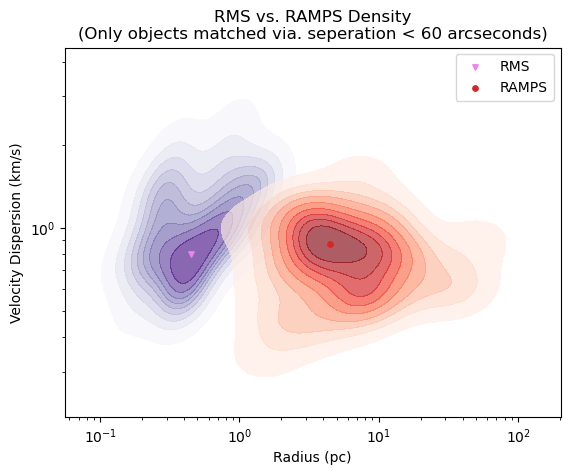

In [69]:
hist_bins = np.logspace(0.01, 100)

fig, ax = plt.subplots()
plt.loglog()

sns.kdeplot(x = matching_DF_broad['RMS Size (pc)'], y = matching_DF_broad['RMS Dispersion (km/s)'], fill = True, cmap = 'Purples', cbar = False, alpha = 0.65)
sns.kdeplot(x = matching_DF_broad['RAMPS Size (pc)'], y = matching_DF_broad['RAMPS Dispersion (km/s)'], fill = True, cmap = 'Reds', cbar = False, alpha = 0.65)

plt.scatter(.45, .8, s=15, color='violet', label='RMS', marker='v')
plt.scatter(4.5, .87, s = 15, marker = 'o', color = 'tab:red', label = 'RAMPS')


plt.xlabel('Radius (pc)')
plt.ylabel('Velocity Dispersion (km/s)')
ax.legend()
plt.title('RMS vs. RAMPS Density\n(Only objects matched via. seperation < 60 arcseconds)')

# plt.show()

plt.savefig("/users/hfwest/GBO-REU/plots/Larson_Density4--West-Morgan.png", bbox_inches = 'tight', pad_inches = 0.1)